In [20]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [21]:
train  = pd.read_csv('C:/Users/CVA/Downloads/train.csv') 
test = pd.read_csv('C:/Users/CVA/Downloads/test.csv')

In [22]:
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


###### Text data, being inherently unstructured, often contains diverse forms of noise, making it challenging for direct analysis. To overcome these challenges, the initial step involves text preprocessing, which is a two-fold process:



## Data Inspection & Data Cleaning

#  DATA INSPECTION

In [23]:
train[train['label'] == 0].head(10)          #CHECKING THE NONRACIST COMMENTS

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [24]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [25]:
train.shape, test.shape   #finding shape of both the data

((31962, 3), (17197, 2))

the tweets in train set are 31962 while tweets in test are 17197  

###### findind racist and no racist tweets 

In [26]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

 here racist tweets are 2242 while nonracists are 29720

#### Now we will check the distribution of length of the tweets, in terms of words, in both train and test data

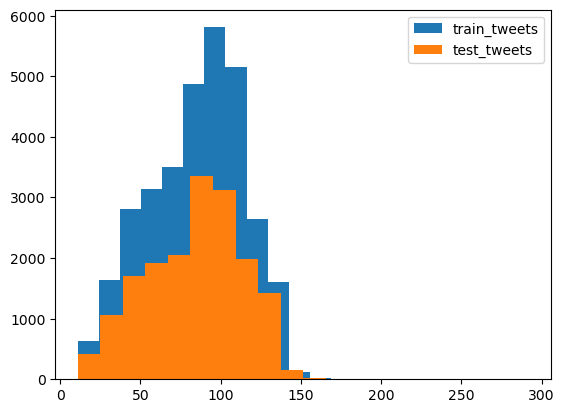

In [27]:
length_train = train['tweet'].str.len() 
length_test = test['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

## DATA CLEANING

#### Cleaning data for sentiment analysis, especially for tweets, involves several steps to handle noise, irrelevant information, and other challenges associated with unstructured text.

##### First we will combine both the dataset for better result later we will split it.

In [28]:
combi = pd.concat([train, test], ignore_index=True)
combi.shape


(49159, 3)

 Now e will define a function "The `clean_tweet` function", which is a customizable text cleaning tool for tweets. Users can provide a list of regular expression patterns (`custom_patterns`) they want to remove from a tweet. The function iterates through these patterns, removes them from the tweet, and converts the tweet to lowercase before returning the cleaned text. This allows users to tailor the cleaning process based on their specific requirements, such as removing URLs, user mentions, or other unwanted patterns..

In [29]:
def clean_tweet(tweet, custom_patterns=None):
    
    
    if custom_patterns is None:
        custom_patterns = []

    # Remove specified custom patterns
    for pattern in custom_patterns:
        tweet = re.sub(pattern, '', tweet, flags=re.MULTILINE)

    # Convert to lowercase
    tweet = tweet.lower()

    return tweet

# Example usage:
original_tweet = "Check out this amazing article! @user123 #excited https://example.com"
user_defined_patterns = [r'http\S+|www\S+|https\S+', r'@\w+', r'[^a-zA-Z\s]']

cleaned_tweet = clean_tweet(original_tweet, user_defined_patterns)
print("Original Tweet:", original_tweet)
print("Cleaned Tweet:", cleaned_tweet)

Original Tweet: Check out this amazing article! @user123 #excited https://example.com
Cleaned Tweet: check out this amazing article  excited 


In [30]:
combi['tidy_tweet'] = combi['tweet'].apply(clean_tweet, custom_patterns=[r'@\w+'])


The provided code snippet applies a text cleaning function (`clean_tweet`) to a column of tweets in a DataFrame (`combi`). Specifically, it removes user mentions (e.g., @username) from each tweet. Instead of using `np.vectorize`, the more straightforward `apply` method is employed. The resulting cleaned tweets are stored in a new column named 'tidy_tweet' in the same DataFrame (`combi`).

##### we have passed “@[]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

In [31]:
combi.head(10)      # tide_tweet will contain the cleaned and processed tweets 

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so #gr8 !


### Now we will Remove Punctuations, Numbers, and Special Characters

In [32]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)
combi.head(10)


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


The code modifies the 'tidy_tweet' column by replacing all non-alphabetic characters and '#' with a space. This step is commonly performed in text preprocessing for tasks like sentiment analysis, where only letters and specific symbols might be relevant for analysis

#### removing short words

now i will remove all those short words which is meaningless or will not effect the tweet like hmm, ohh etc.

In [33]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [34]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


##### Text normalization is a crucial step in natural language processing that involves transforming text data into a standardized and consistent format. In this context, the goal is to normalize tweets using NLTK's PorterStemmer() function, but before that, tokenization is required.


## Tokenization  
###### Tokenization is the process of breaking down a text into individual units called tokens, which can be words, phrases, or symbols. Once tokenized, text data becomes more manageable for analysis

In [35]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

The code tokenized the cleaned tweets in the 'tidy_tweet' column by applying a lambda function that splits each tweet into individual tokens. The resulting tokens are stored in the tokenized_tweet variable, providing a structured representation of the text data for further analysis.

#### Now normalizing the tokenized tweets.

In [36]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
# stemming is a text normalization technique that helps in reducing words to their base form, making the text more consistent for analysis.
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 

The provided code utilizes NLTK's PorterStemmer to perform stemming on a set of tokenized tweets. After importing the PorterStemmer class, the code initializes an instance of the stemmer. It then applies stemming to each token in the tokenized tweets using a lambda function. Stemming involves reducing words to their root or base form, aiding in text normalization for subsequent analysis.

In [37]:
tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

Stitching the tokens back together is essential for reconstructing the processed text into a coherent and readable format. After tokenization and stemming, the text is represented as individual tokens, and detokenization brings these tokens together into a meaningful sequence.

The detokenization step using nltk's MosesDetokenizer function is particularly useful because it takes into account the specific nuances of the language and helps generate grammatically correct and natural language output. Detokenization ensures that the text maintains its original structure and readability, making it suitable for various downstream tasks such as sentiment analysis 

#####  nltk’s MosesDetokenizer function for detokenization

In [38]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

In [39]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv



### Creating a narrative and visualizing insights from tweets


In this section of the project, the primary focus is on exploring and visually representing patterns within the cleaned tweet data. This process begins by formulating key questions related to the dataset, setting the stage for insightful analysis. The questions encompass a range of topics, including the identification of common words, sentiment-specific word analysis, examination of hashtags, and exploration of broader trends associated with the dataset and sentiment categories.

To bring these insights to life, a WordCloud visualization technique is employed. WordClouds provide an intuitive representation of word frequencies, with larger and bolder words indicating higher occurrence rates.

In [40]:
!pip install wordcloud



In [41]:
from wordcloud import WordCloud 

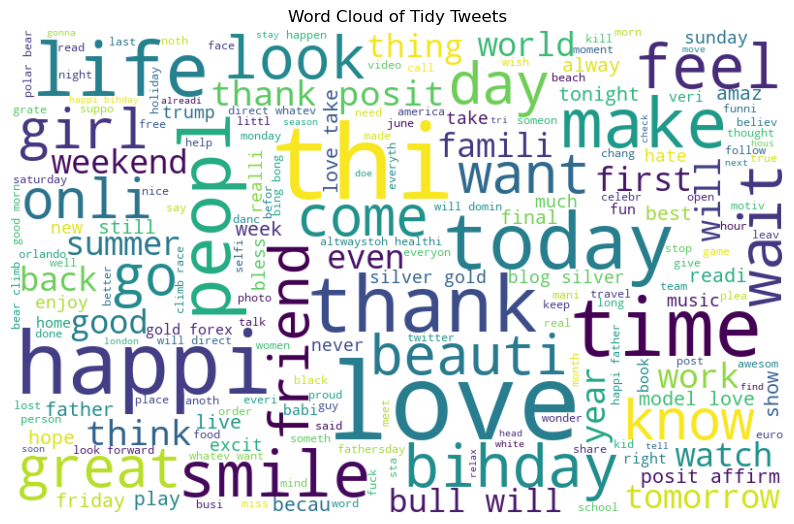

In [42]:

# Combine all words in 'tidy_tweet' column into a single string
all_words = ' '.join([text for text in combi['tidy_tweet']]) 

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white').generate(all_words)

# Create a plot
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud of Tidy Tweets')  # Add a title
plt.show()


The current word cloud primarily showcases positive or neutral terms such as "love," "great," "friend," and "life." However, it doesn't provide insights into words associated with racist or sexist content. To address this, we will create distinct word clouds for both classes, distinguishing between non-offensive and offensive tweets in our training dataset.

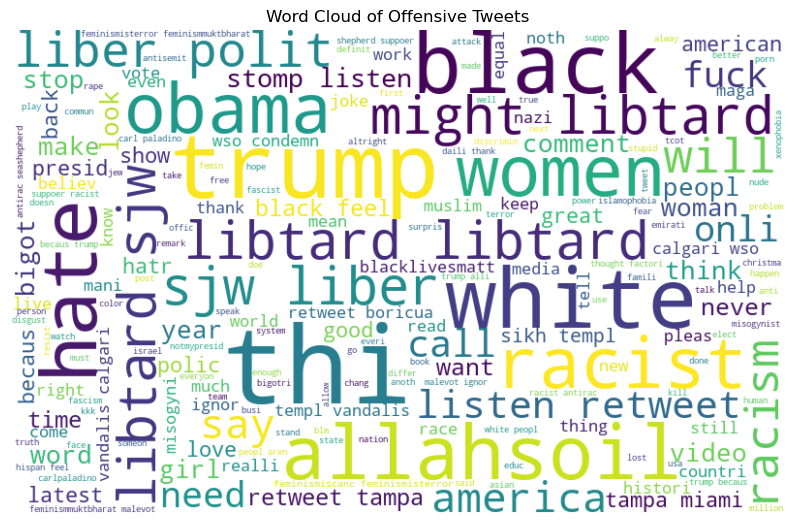

In [43]:
offensive_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]]) 

# Generate the word cloud for offensive tweets
wordcloud_offensive = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white').generate(offensive_words)

# Create a plot for offensive tweets
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud_offensive, interpolation="bilinear") 
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud of Offensive Tweets')  # Add a title
plt.show()


## Exploring the Influence of Hashtags on Tweet Sentiment

We should try to check whether these hashtags add any value to our sentiment analysis task

In [44]:
# function to collect hashtags 
def hashtag_extract(x):    
    hashtags = []    
    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    
    return hashtags

In [45]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 
# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

## positive Hashtags

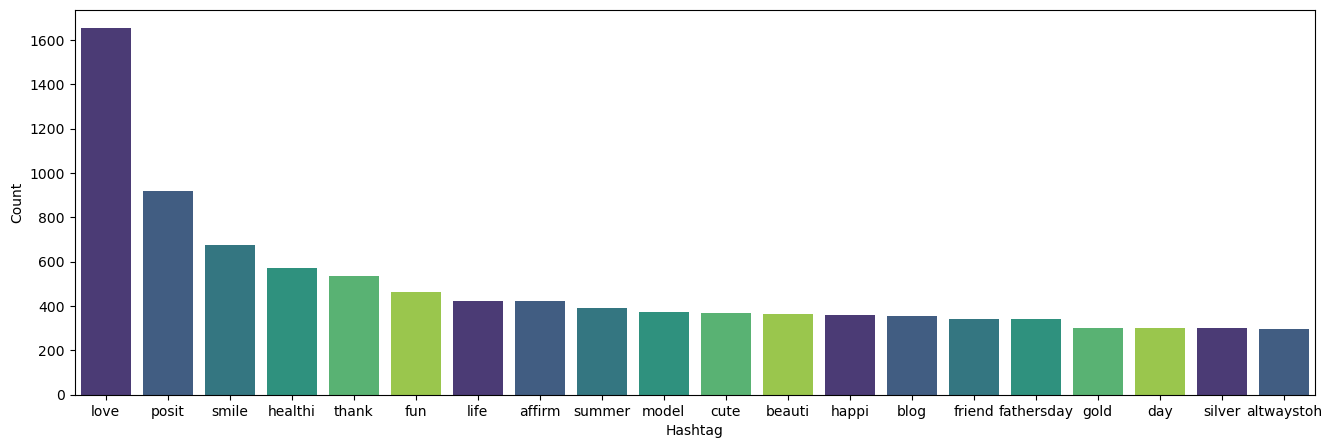

In [46]:
import nltk
from nltk import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming HT_regular is a list containing hashtags
a = FreqDist(HT_regular)

# Create a DataFrame with hashtag counts
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

# Select the top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)

# Choose a multi-color palette (e.g., 'muted' palette)
color_palette = sns.color_palette("viridis")

# Plot the bar chart with multi-colors
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count", palette=color_palette)
ax.set(ylabel='Count')
plt.show()


## Negative HASHTAGS

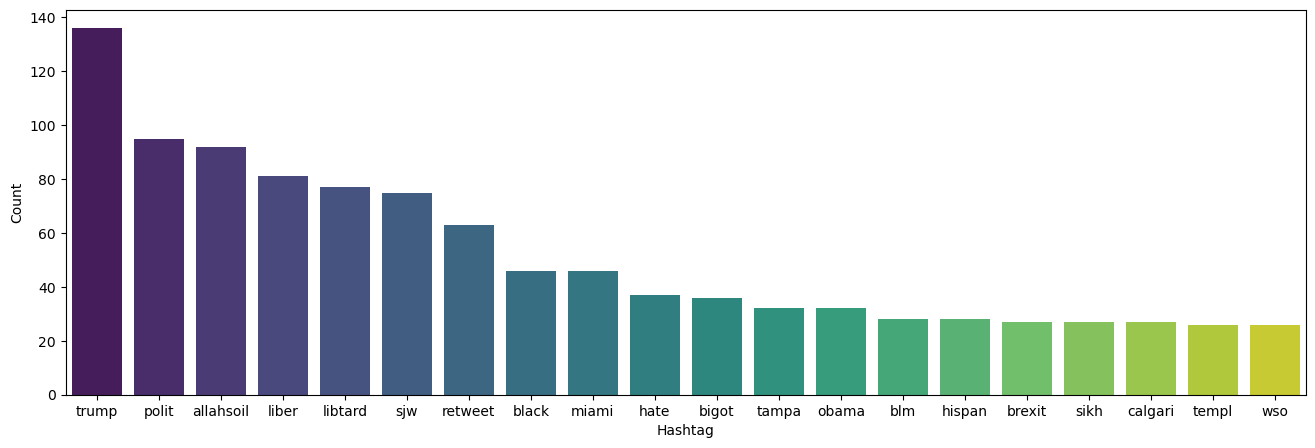

In [47]:
import nltk
from nltk import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming HT_negative is a list containing negative hashtags
a = FreqDist(HT_negative)

# Create a DataFrame with hashtag counts
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

# Select the top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)

# Choose a custom color palette
custom_palette = sns.color_palette("viridis", n_colors=len(d))

# Plot the bar chart with the custom color palette
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count", palette=custom_palette)
ax.set(ylabel='Count')
plt.show()


# Bag-of-Words Features

Convert the tokenized text into a bag of words representation. Each unique word becomes a feature.

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

###### CountVectorizer: Converts a collection of text documents to a matrix of token counts, representing the Bag of Words (BoW) model.
###### TfidfVectorizer: Converts a collection of text documents to a matrix of TF-IDF features, considering the importance of terms in the entire corpus.

######  (gensim): Learns distributed representations of words in a continuous vector space, capturing semantic relationships between words based on their context in the dataset.

In [50]:
# Initialize CountVectorizer with specified parameters
bow_vectorizer = CountVectorizer(
    max_df=0.90,      # Ignore terms that appear in more than 90% of the documents
    min_df=2,         # Ignore terms that appear in less than 2 documents
    max_features=1000,  # Limit the number of features to the top 1000 most frequent terms
    stop_words='english'  # Remove common English stop words
)

# Apply CountVectorizer to the 'tidy_tweet' column in the DataFrame
bow_matrix = bow_vectorizer.fit_transform(combi['tidy_tweet'])

# Display the shape of the resulting bag-of-words matrix
print("Shape of BoW Matrix:", bow_matrix.shape)

Shape of BoW Matrix: (49159, 1000)


Consider a Corpus C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a dictionary and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

Let us understand this using a simple example.

d1: He is a lazy boy. She is also lazy.

d2: Smith is a lazy person.

The dictionary created would be a list of unique tokens in the corpus =[‘He’,’She’,’lazy’,’boy’,’Smith’,’person’]

Here, D=2, N=6

The matrix will be of size 2 X 6 

### the matrix of our dataset tweets is 49159  X  1000 

# TF IDF  USING TfidfVectorizer:

##### TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects how important a word is to a document in a collection or corpus. It operates by assigning weights to words based on their occurrence and distribution in a corpus

##### TF = (Number of times term t appears in a document)/(Number of terms in the document)

###### IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

###### TF-IDF = TF*IDF

In [51]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet']) 
tfidf.shape

(49159, 1000)

 Word2Vec features are powerful for capturing semantic relationships and similarities between words, making them valuable for tasks like sentiment analysis

## WORD2VEC FEATURES

Word2Vec, or Word Embeddings, is a technique used to represent words in a continuous vector space, capturing semantic relationships between words.

The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are able to achieve tasks like King -man +woman = Queen

The process involves training a neural network on a large corpus to learn these vector representations. Once trained, these embeddings can be used as features for various natural language processing tasks, providing a dense representation of words that captures their semantic meanings.

#### Word2Vec is not a single algorithm but a combination of two techniques – CBOW (Continuous bag of words) and Skip-gram model

####  CBOW: Predict a missing word based on its context. If you see the words "The cat ___ on the mat," CBOW tries to predict the missing word ("sat") by considering the context.
#### Skip-gram: Predict the context (surrounding words) based on a given word.Example: Given the word "apple," Skip-gram might predict words like "delicious," "fruit," or "red" as likely neighbors.

We will train a Word2Vec model on our data to obtain vector representations for all the unique words present in our corpus.

In [52]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6510778, 7535460)

# Word2Vec model testing

We will specify a word and the model will pull out the most similar words from the corpus.

In [53]:
model_w2v.wv.most_similar(positive="kill")

[('koran', 0.4780538082122803),
 ('whitesboro', 0.47719255089759827),
 ('allegi', 0.4744190573692322),
 ('aptli', 0.4710592031478882),
 ('pledg', 0.4599134027957916),
 ('unarm', 0.4585517346858978),
 ('cked', 0.45593419671058655),
 ('ten', 0.45191770792007446),
 ('#ubi', 0.44944846630096436),
 ('albino', 0.44876617193222046)]

In [54]:
model_w2v.wv.most_similar(positive="pakistan")

[('invis', 0.7764866352081299),
 ('mullah', 0.775617241859436),
 ('capon', 0.7533725500106812),
 ('evas', 0.746196448802948),
 ('#paxex', 0.7267524600028992),
 ('#lnp', 0.7190037369728088),
 ('achil', 0.70876544713974),
 ('amongst', 0.7087015509605408),
 ('bicker', 0.7023894786834717),
 ('slant', 0.7016946077346802)]

In [55]:
model_w2v.wv.most_similar(positive="islam")

[('radic', 0.7328566908836365),
 ('wahab', 0.6623133420944214),
 ('unifi', 0.6595408916473389),
 ('crusad', 0.6585903167724609),
 ('extremist', 0.6557242274284363),
 ('#orla', 0.6553698182106018),
 ('oppounist', 0.6492392420768738),
 ('phrase', 0.6344740390777588),
 ('bloodsh', 0.6324946880340576),
 ('prog', 0.6320908665657043)]

In [56]:
model_w2v.wv.most_similar(positive="america")

[('globalist', 0.5380206108093262),
 ('#dumbdonalddestroy', 0.530824601650238),
 ('hawk', 0.5171195864677429),
 ('jackal', 0.5146558284759521),
 ('#palestinian', 0.5061660408973694),
 ('unjust', 0.503944456577301),
 ('sensation', 0.5019364953041077),
 ('tyranni', 0.5006933212280273),
 ('#stupidlog', 0.49729859828948975),
 ('#exploit', 0.4945226311683655)]

We observe that our Word2Vec model effectively identifies the most analogous words for a given term. This capability stems from its acquisition of vectors for each distinct word in our dataset, and it leverages cosine similarity to determine the most comparable vectors (words).

In [57]:
# Assuming 'train_size' is the original size of the training set
train_size = len(train)

# Split the combined data back into train and test sets
train_split = combi.iloc[:train_size, :]
test_split = combi.iloc[train_size:, :]

# Verify the shapes
print("Train set shape:", train_split.shape)
print("Test set shape:", test_split.shape)


Train set shape: (31962, 4)
Test set shape: (17197, 4)


# modeling

## Naive Bayes Algorithm

#### By employing Naive Bayes with TF-IDF, we establish a baseline model for sentiment analysis that can be further optimized 

Naive Bayes is a commonly used algorithm for text classification tasks, and Multinomial Naive Bayes specifically suits scenarios where the features are discrete, such as word counts in text data.

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from joblib import dump, load

# Assuming 'text' is the column containing preprocessed text and 'label' is the target variable
X = train_split['tidy_tweet']
y = train_split['label']

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=50000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Choose and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Save the trained Naive Bayes model to a file
model_filename = 'naive_bayes_model.joblib'
dump(nb_model, model_filename)

# Predictions on the validation set
y_pred = nb_model.predict(X_val)

# Evaluate the model
print("Accuracy:", metrics.accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_val, y_pred))
print("Classification Report:\n", metrics.classification_report(y_val, y_pred))


Accuracy: 0.9407164085718754
Confusion Matrix:
 [[5937    0]
 [ 379   77]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      5937
         1.0       1.00      0.17      0.29       456

    accuracy                           0.94      6393
   macro avg       0.97      0.58      0.63      6393
weighted avg       0.94      0.94      0.92      6393



##### Accuracy provides an overall measure of the model's correctness.
##### Classification report includes precision, recall, and F1-score for each class. Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned).
##### Confusion matrix gives a detailed breakdown of correct and incorrect predictions.

 ### uses 5-fold cross-validation to estimate the model's accuracy

In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb_model, X_tfidf, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.9402102522568979


In [75]:
from joblib import dump, load

# Save the trained Naive Bayes model to a file
model_filename = 'naive_bayes_model.joblib'
dump(nb_model, model_filename)


['naive_bayes_model.joblib']